## Homework 2 and Financial Math Practice


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import sklearn
import datetime
import yfinance as yf
import scipy as scs
import cufflinks as cf
import plotly.offline as plyo
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [5]:
tickers = "SPY EEM TIP ^RUT ^TNX DBC VGSLX VEA SHV ^VIX"
#Download adjusted close numbers
Start = "2005-12-31"
End = "2022-07-31"
adj_close = yf.download(tickers, start = "2005-12-31", end = "2022-7-31")["Adj Close"]
adj_close.dropna(inplace = True)
adj_close.columns = ["commodity","EEM","Short_Tresury","SPY","TIPs","VanFor_Eq","Real_Estate","Russell","10_year_tres", "VIX"]

[*********************100%***********************]  10 of 10 completed


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

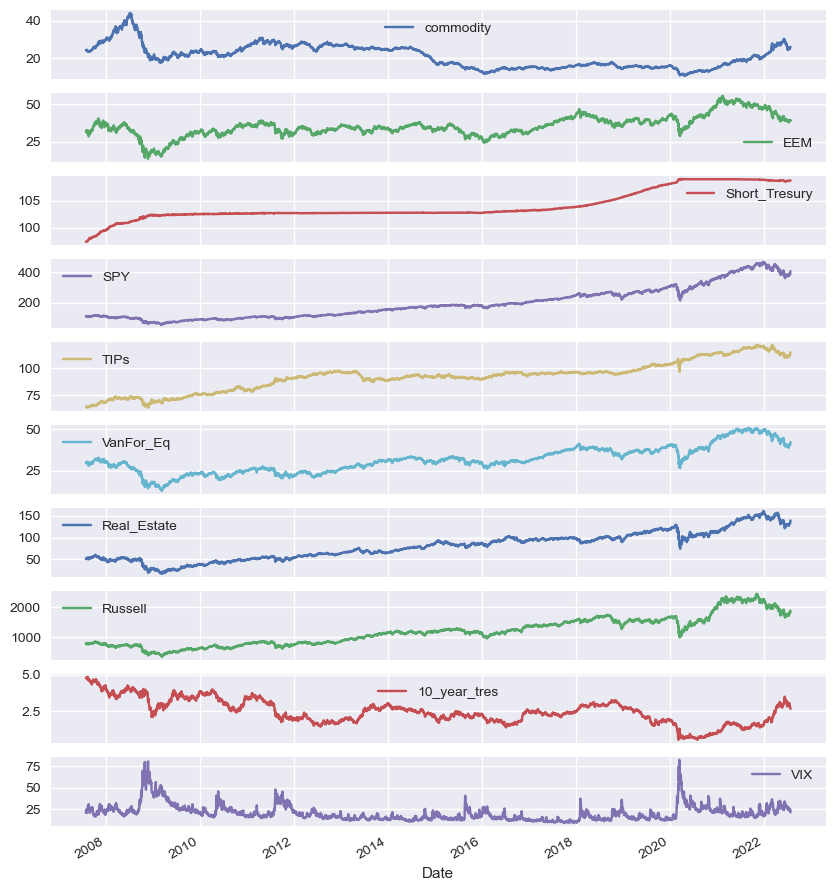

In [6]:
# Plot Prices 
plt.style.use("seaborn")
adj_close.plot(figsize = (10,12), subplots = True)


Text(0.5, 1.0, 'Simple Return')

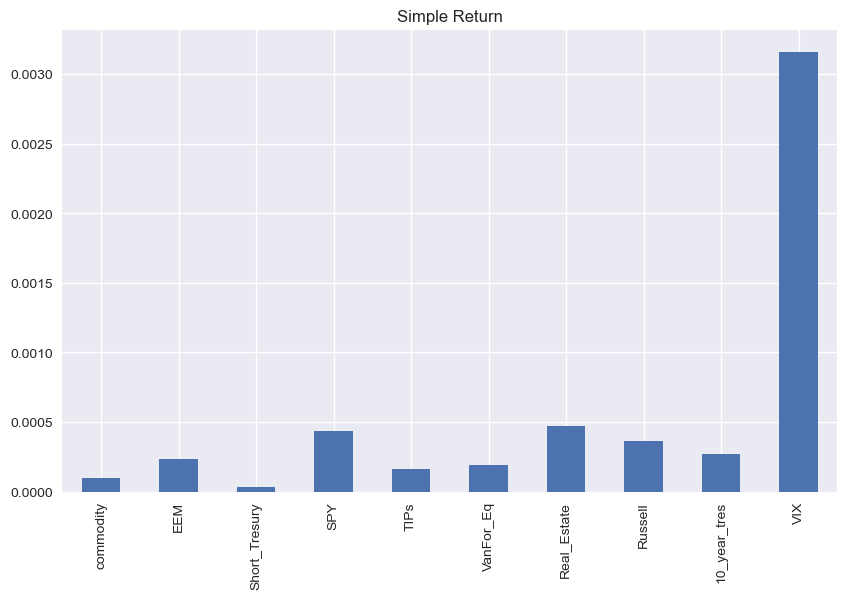

In [7]:
#Create a Data Frame that calculates the daily return

returns = adj_close.pct_change().round(4).dropna()
returns.mean().plot(kind = 'bar', figsize = (10,6))
plt.title("Simple Return")

In [8]:
#Compute Log-Returns
rets_log = np.log(adj_close/adj_close.shift(1))
plyo.iplot(
    rets_log.iplot(kind = 'hist',
                   subplots = True,
                   bins = 225,
                   asFigure= True),
    image = 'png',
    filename = 'hist_log_rets'
)

### Computing the Summary Statistics of the log-returns

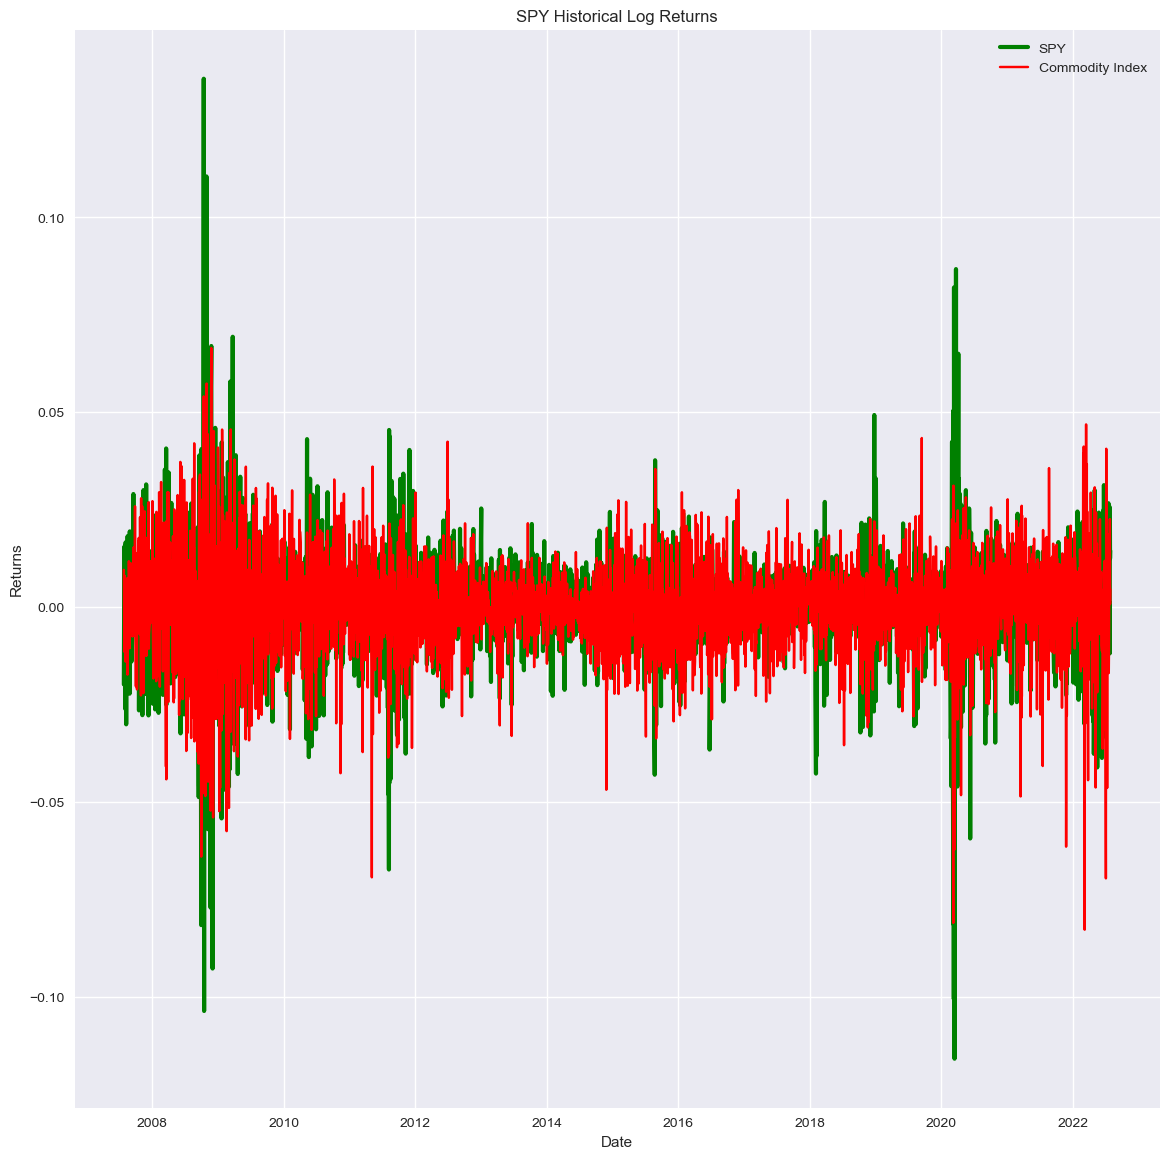

In [9]:
rets_log.describe().round(6)
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (14,14))
plt.title("SPY Historical Log Returns")
ax.plot(rets_log["SPY"], c = "green", label = "SPY", linewidth = 3)
ax.plot(rets_log["commodity"], c = "red", label = "Commodity Index")
plt.legend(shadow = True, loc = "upper right")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

Text(0.5, 1.0, 'Historical Returns of Major Asset Classes')

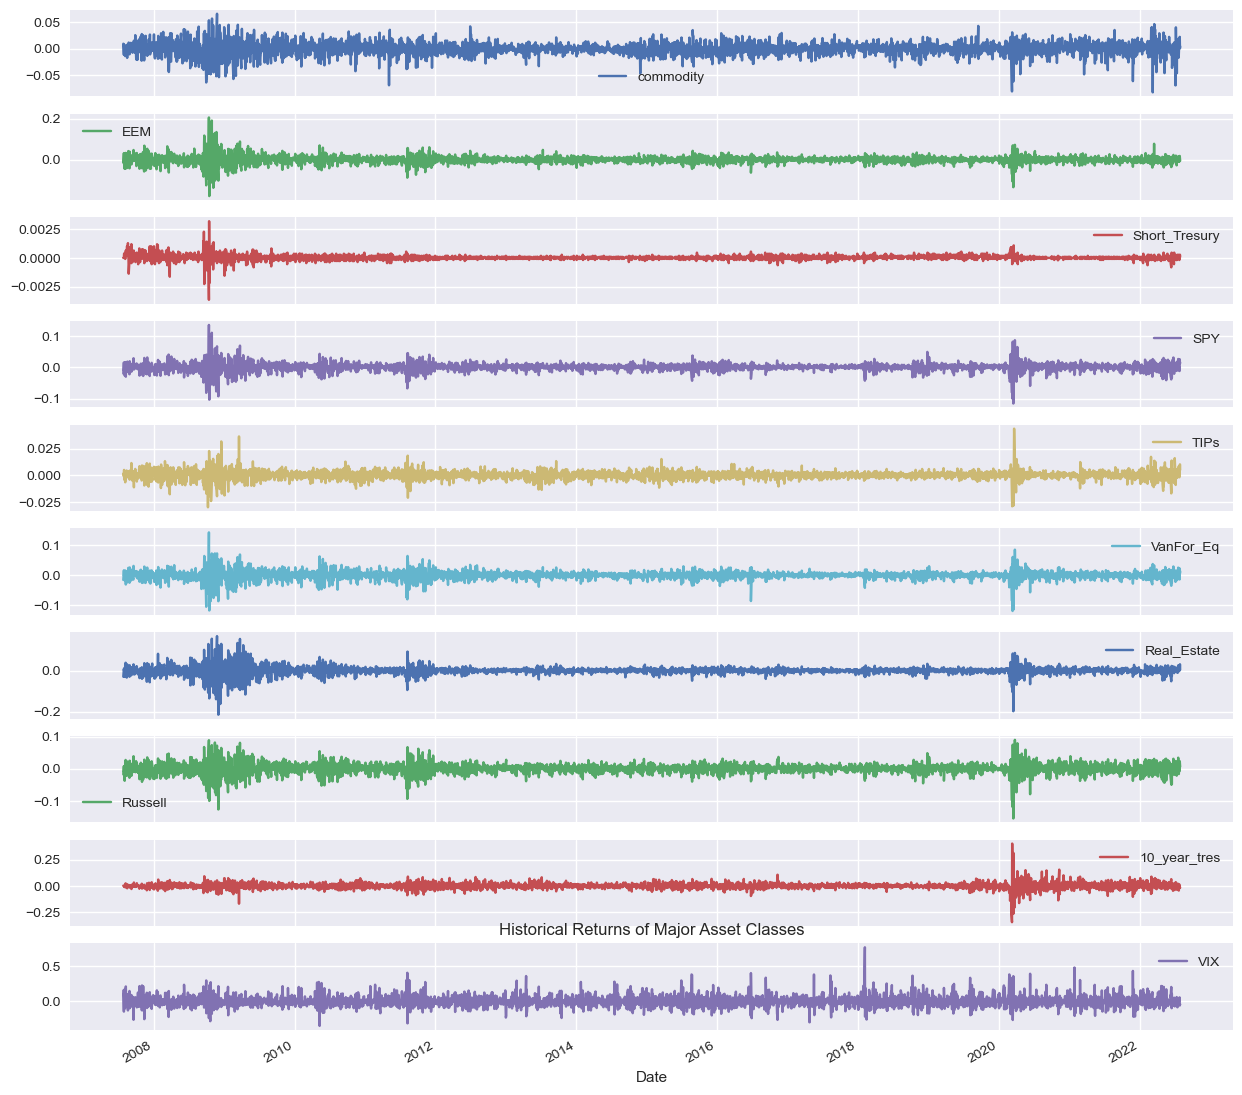

In [10]:
plt.style.use("seaborn")
rets_log.plot(subplots = True, figsize = (15,15))
plt.title("Historical Returns of Major Asset Classes")

* Now replicate SPY Returns as a linear combination of the other asset classes

## UChicago Homework Practice
* Use the data provided which has return data from various asset classes.
  

### Correlation

* First download the data from excel and display a matrix of the returns

Which pair has the highest correlation? Which pair has the smallest (most negative) correlation?

In [11]:
## Download the Data

file_path = "C:/Users/dcste/OneDrive/Uchicago_practice/multi_asset_etf_data.xlsx"
info = pd.read_excel(file_path, sheet_name = "descriptions")
info.rename(columns = {"Unnamed: 0": "Symbol"}, inplace = True)
info.set_index("Symbol", inplace = True)

rets = pd.read_excel(file_path, sheet_name = "total returns")
rets.set_index("Date", inplace =True)
rets.drop(columns = "SHV")

rets_excess = pd.read_excel(file_path, sheet_name = "excess returns")
rets_excess.set_index("Date", inplace = True)
# Sort columns by order of description

symbol_list = info.index.drop("SHV")
rets = rets[symbol_list]
rets_excess = rets_excess[symbol_list]

rets.head()


,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP
Date,,,,,,,,,,,
2009-04-30,0.099346,0.115190,0.155583,0.230202,0.022882,0.138460,-0.001000,0.296151,-0.027452,0.008993,-0.017951
2009-05-31,0.058454,0.131918,0.159400,0.053893,0.027865,0.028555,0.162663,0.022727,-0.020773,0.053672,0.019966
2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003437,0.033517,-0.026259,-0.024863,-0.005571,0.005148,0.001982
2009-07-31,0.074606,0.100415,0.110146,0.143247,0.015326,0.069190,0.018568,0.105799,0.008316,0.031285,0.000879
2009-08-31,0.036940,0.045031,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007634,0.007628,0.008413


In [12]:
info

,ETF Description
Symbol,
SPY,Domestic Equity SPDR S&P500
EFA,Foreign Equity iShares EAFE
EEM,iShares Emerging Markets
PSP,Private Equity Invesco Global Private Equity
QAI,Absolute Return IQ Multi-Strat
HYG,High Yield iShares High Yield Corporate Bond
DBC,Invesco DB Commodity Index Tracking Fund
IYR,Real Estate iShares US Real Estate
IEF,Domestic Bonds iShares 7-10 Year Treasury


In [13]:
rets

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP
Date,,,,,,,,,,,
2009-04-30,0.099346,0.115190,0.155583,0.230202,0.022882,0.138460,-0.001000,0.296151,-0.027452,0.008993,-0.017951
2009-05-31,0.058454,0.131918,0.159400,0.053893,0.027865,0.028555,0.162663,0.022727,-0.020773,0.053672,0.019966
2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003437,0.033517,-0.026259,-0.024863,-0.005571,0.005148,0.001982
2009-07-31,0.074606,0.100415,0.110146,0.143247,0.015326,0.069190,0.018568,0.105799,0.008316,0.031285,0.000879
2009-08-31,0.036940,0.045031,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007634,0.007628,0.008413
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,-0.052741,-0.036350,-0.000205,-0.086028,-0.020761,-0.026549,0.078922,-0.082314,-0.021130,-0.026176,-0.020588
2022-02-28,-0.029517,-0.034292,-0.043202,-0.073602,-0.006746,-0.008590,0.064674,-0.045881,-0.003041,-0.011197,0.008557
2022-03-31,0.037590,0.005190,-0.033811,-0.007721,-0.002587,-0.012871,0.091747,0.068646,-0.040609,-0.042240,-0.018755


In [14]:
rets_excess

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP
Date,,,,,,,,,,,
2009-04-30,0.098793,0.114637,0.155029,0.229649,0.022329,0.137907,-0.001553,0.295598,-0.028005,0.008440,-0.018504
2009-05-31,0.058925,0.132390,0.159872,0.054364,0.028337,0.029027,0.163134,0.023199,-0.020301,0.054144,0.020438
2009-06-30,-0.001255,-0.014649,-0.023094,0.044849,-0.004036,0.032918,-0.026858,-0.025462,-0.006171,0.004549,0.001383
2009-07-31,0.074633,0.100443,0.110173,0.143274,0.015353,0.069218,0.018595,0.105827,0.008344,0.031312,0.000907
2009-08-31,0.036504,0.044595,-0.013572,0.032977,-0.004587,-0.017405,-0.040800,0.131503,0.007198,0.007192,0.007977
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,-0.051926,-0.035535,0.000610,-0.085213,-0.019946,-0.025734,0.079737,-0.081499,-0.020315,-0.025361,-0.019773
2022-02-28,-0.029154,-0.033929,-0.042840,-0.073240,-0.006383,-0.008228,0.065037,-0.045518,-0.002678,-0.010834,0.008919
2022-03-31,0.037953,0.005552,-0.033449,-0.007359,-0.002225,-0.012509,0.092110,0.069009,-0.040247,-0.041877,-0.018393


In [36]:
Ntime, Nassets = rets_excess.shape

In [54]:
# Optimal Portfolio Via Non-Negative Least Squares Regression

beta = LinearRegression(fit_intercept = False, positive = True).fit(rets_excess, np.ones((Ntime, 1))).coef_.transpose()

In [55]:
beta /= beta.sum()

In [56]:
beta = pd.DataFrame(beta, index = rets_excess.columns, columns= ['%Weight'])
beta

,%Weight
SPY,0.391144
EFA,0.000000
EEM,0.000000
PSP,0.000000
QAI,0.000000
HYG,0.000000
DBC,0.000000
IYR,0.000000
IEF,0.608856
BWX,0.000000


The smallest correlation is ('PSP', 'EFA') and the highest correlation is ('DBC', 'IEF')


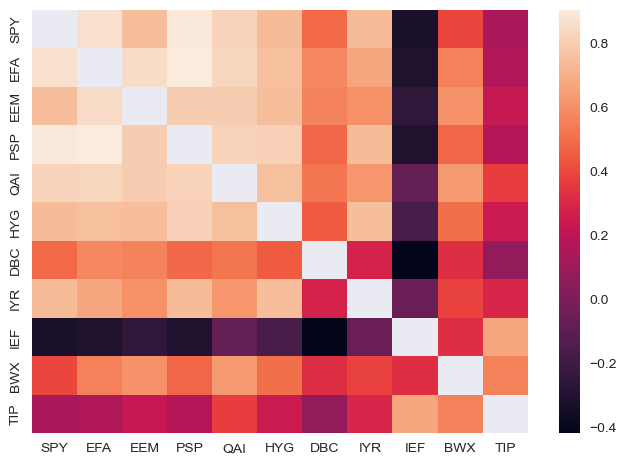

In [15]:
# Calculating the correlation 

corrmat = rets.corr()
corrmat[corrmat == 1] = None
sns.heatmap(corrmat)

corr_rank = corrmat.unstack().sort_values().dropna()
print(f"The smallest correlation is {corr_rank.index[-1]} and the highest correlation is {corr_rank.index[0]}")

### Multivariate Regression
Suppose we want to decompose PSP into a linear combination of the other asset classes.
* PSP is a benchmark of private equity returns.
* Estimate the equation:
    
    $r_{t}^{PSP} = \alpha + \beta r_{t} + e$
    
    * Where **rt** denotes the vector of all other returns (exclusing PSP) at time **t.**
* Report the estimated alpha, betas, and the r-squared

In [16]:



y = rets["PSP"]
X_full = rets.drop(columns=["PSP"])


mod_1 = LinearRegression(fit_intercept = True).fit(X_full, y)
mod_1.coef_
estimation = sm.OLS(y, sm.add_constant(X_full)).fit()
estimation.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PSP   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     129.4
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           1.24e-67
Time:                        12:39:45   Log-Likelihood:                 394.20
No. Observations:                 158   AIC:                            -766.4
Df Residuals:                     147   BIC:                            -732.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.002     -1.043      0.299      -0.006       0.002
SPY            0.4408      0.109      4.041      0.000       0.225       0.656
EFA            0.5755      0.100      5.741      0.000       0.377       0.774
EEM           -0.0213      0.066     -0.320      0.749      -0.153       0.110
QAI            0.2511      0.299      0.840      0.402      -0.340       0.842
HYG            0.5281      0.128      4.114      0.000       0.274       0.782
DBC           -0.1185      0.046     -2.584      0.011      -0.209      -0.028
IYR            0.0650      0.056      1.152      0.251      -0.047       0.177
IEF           -0.4933      0.208     -2.366      0.019      -0.905      -0.081
BWX            0.0469      0.132      0.355      0.723      -0.214       0.308
TIP            0.3356      0.222      1.509      0.133      -0.104       0.775
==============================================================================
Omnibus:                        5.018   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.829
Skew:                          -0.307   Prob(JB):                       0.0894
Kurtosis:                       3.598   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Replicating PE with a three asset classes
* Try replicationg private equity returns with a few assets. I would suggest that PE returns can be heavily explained by SPY, Absolute Return, and Real Estate.

In [17]:
X_small = sm.add_constant(rets[["SPY","QAI", "IYR"]])
estimation_small = sm.OLS(y, X_small).fit()
estimation_small.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PSP   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     263.0
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           2.28e-60
Time:                        12:39:45   Log-Likelihood:                 357.03
No. Observations:                 158   AIC:                            -706.1
Df Residuals:                     154   BIC:                            -693.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.002     -1.898      0.060      -0.008       0.000
SPY            0.8824      0.102      8.613      0.000       0.680       1.085
QAI            1.0639      0.260      4.088      0.000       0.550       1.578
IYR            0.1964      0.057      3.460      0.001       0.084       0.309
==============================================================================
Omnibus:                        0.178   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.157
Skew:                          -0.074   Prob(JB):                        0.925
Kurtosis:                       2.957   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

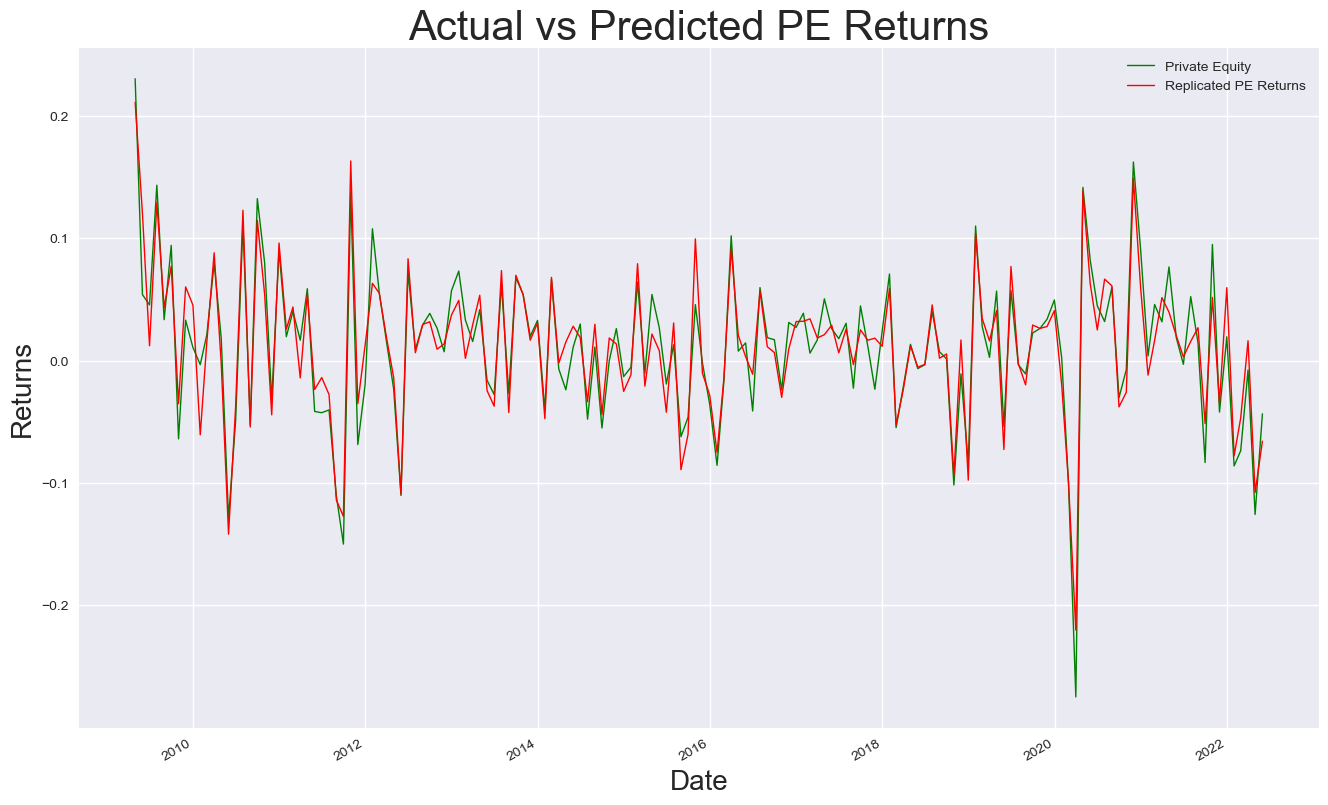

In [18]:
# Graph of full model
full_model = pd.concat([y, pd.DataFrame(data = estimation.predict(sm.add_constant(X_full)), index = X_full.index, columns= ["Replicated"])], axis = 1)
plt.style.use("seaborn")
fig , ax = plt.subplots(figsize = (16,10))
ax.plot(full_model["PSP"], c = "green", label = "Private Equity", linewidth = 1)
ax.plot(full_model["Replicated"], c = "red", label = "Replicated PE Returns", linewidth = 1)
plt.legend(loc = "upper right", shadow = True)
ax.set_ylabel("Returns", fontsize = 20)
ax.set_xlabel("Date", fontsize = 20)
ax.set_title("Actual vs Predicted PE Returns", fontsize = 30)
fig.autofmt_xdate()

#### Replicating Cumlative Returns vs Actual Cumulative Returns

We know cumulative returns is equal to this equation:
    $$r_{it}  =  \prod_{i=1}^{T} (1 +r_{it}) - 1$$

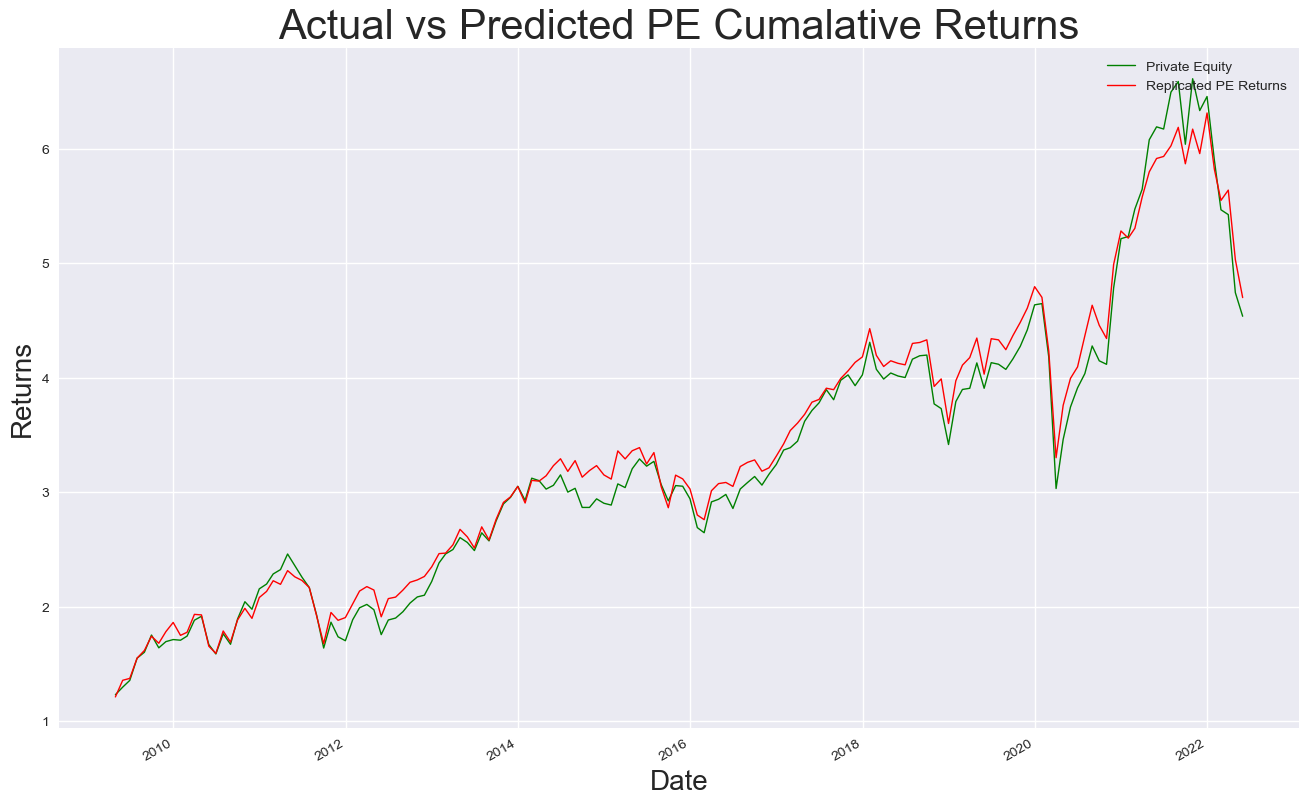

In [19]:
cum_returns = (full_model +1).cumprod()
plt.style.use("seaborn")
fig , ax = plt.subplots(figsize = (16,10))
ax.plot(cum_returns["PSP"], c = "green", label = "Private Equity", linewidth = 1)
ax.plot(cum_returns["Replicated"], c = "red", label = "Replicated PE Returns", linewidth = 1)
plt.legend(loc = "upper right", shadow = True)
ax.set_ylabel("Returns", fontsize = 20)
ax.set_xlabel("Date", fontsize = 20)
ax.set_title("Actual vs Predicted PE Cumalative Returns", fontsize = 30)
fig.autofmt_xdate()

In [20]:
X_SMALL = X_small.drop(columns = "const")

## 1.3 Multicollinearity

Should we be worred about multicollinearity in the full model? Calculate some metrics about $X^{`}X.$ This has to do with rank of the matrix. 

In [21]:
print(f"The conditioning number for the full model is: {np.linalg.cond(X_full.T @ X_full):.5f}.\n The corresponding determinant is: {np.linalg.det(X_full.T @ X_full):.9f}.")
print(f"The conditioning number for the the smaller model is: {np.linalg.cond(X_SMALL.T @ X_SMALL):.5f} and the corresponding determinant is:\n {np.linalg.det(X_SMALL.T @ X_SMALL):.8f}.")

The conditioning number for the full model is: 328.87178.
 The corresponding determinant is: 0.000000000.
The conditioning number for the the smaller model is: 74.25950 and the corresponding determinant is:
 0.00059184.


# Quantifying Relationships for OIL, VIX, SPY, and Russell 200 Index

* First Graph the Price of oil starting before the pandemic along with its corresponding volatility. Then compute the multiple linear regression equation:
                    
    $r_{it}^{spy} = \alpha + \beta_{1}r_{it}^{oil} + \beta_{2}r_{it}^{vix} + \beta_{3}r_{it}^{rut} +\epsilon$

[*********************100%***********************]  4 of 4 completed


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

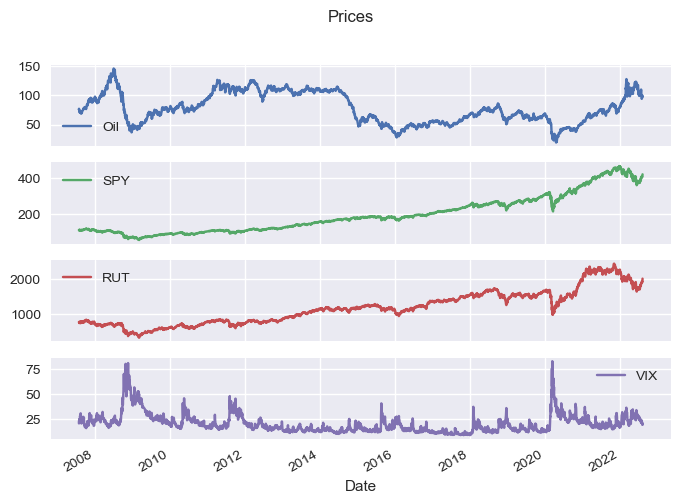

In [22]:
tixs = "SPY BZ=F ^VIX ^RUT"
prices = pd.DataFrame(yf.download(tixs, start = "2005-01-01", end = "2022-08-13")["Adj Close"])
prices.dropna(inplace = True)
prices.columns = ["Oil", "SPY", "RUT", "VIX"]
prices.plot(subplots = True, title = "Prices")

In [23]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3728 entries, 2007-07-30 to 2022-08-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Oil     3728 non-null   float64
 1   SPY     3728 non-null   float64
 2   RUT     3728 non-null   float64
 3   VIX     3728 non-null   float64
dtypes: float64(4)
memory usage: 145.6 KB


In [24]:
print(prices["2022-05-01":].mean())
print(prices["2022-05-01":].std())

Oil     109.482778
SPY     392.929660
RUT    1809.696392
VIX      26.662083
dtype: float64
Oil     7.895581
SPY    15.014068
RUT    83.152801
VIX     3.627232
dtype: float64


<AxesSubplot:xlabel='Date'>

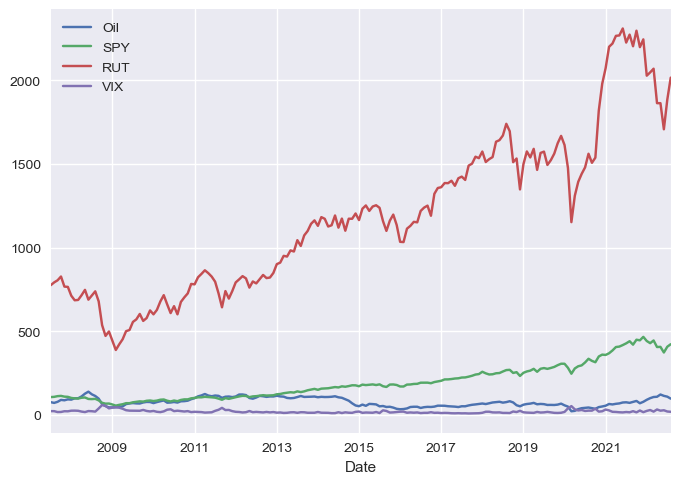

In [25]:
#Convert the Prices to monthly periods
prices_month = pd.DataFrame(prices.resample("1m",label = "right").last())
prices_month.plot()

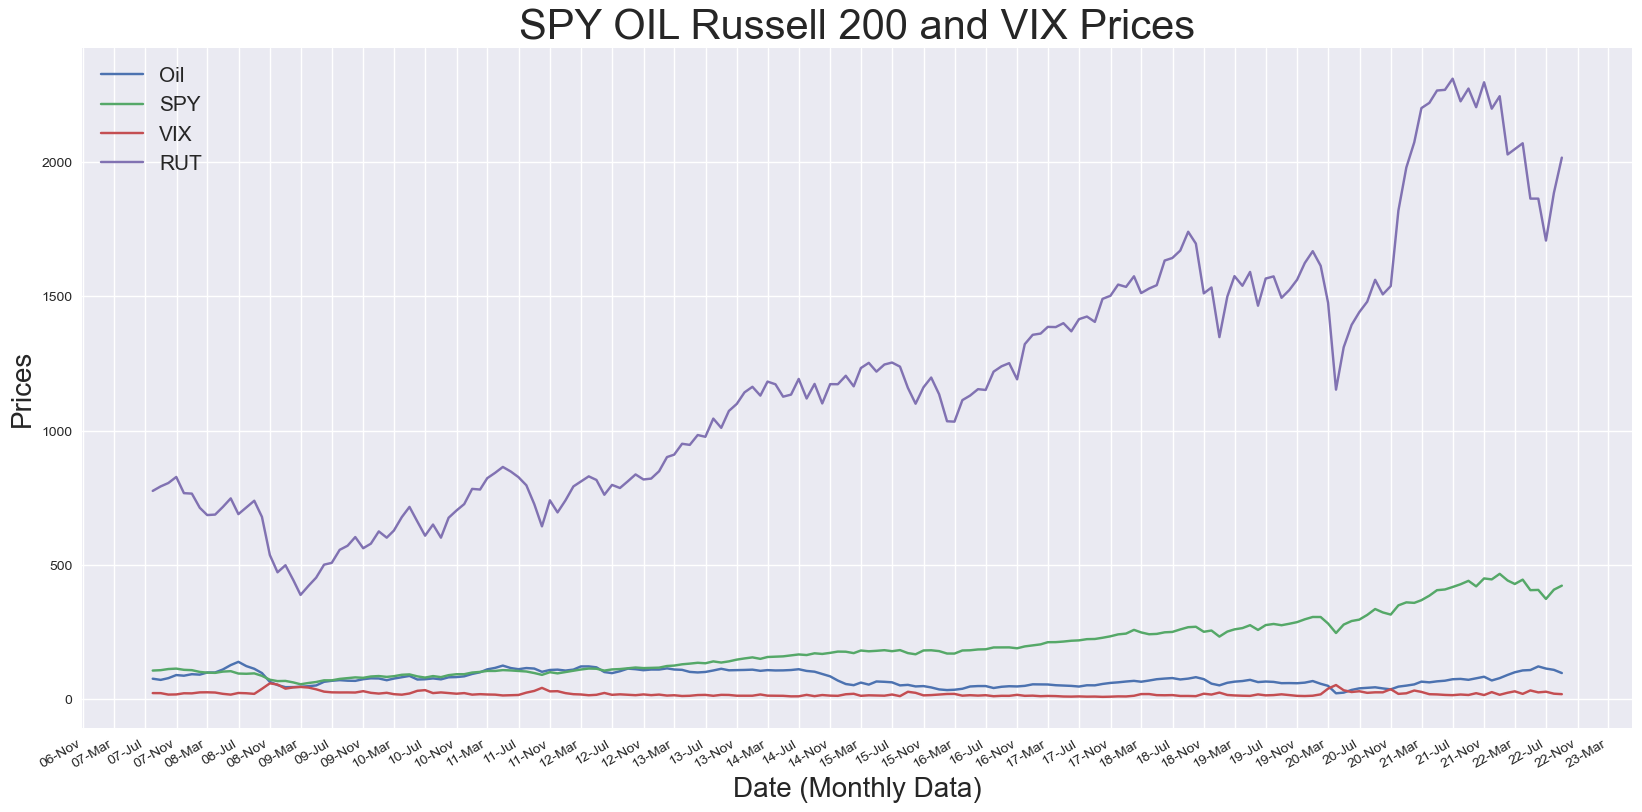

In [26]:
plt.figure(figsize = (20,10))
plt.plot(prices_month["Oil"], label = "Oil")
plt.plot(prices_month["SPY"], label = "SPY")
plt.plot(prices_month["VIX"], label = "VIX")
plt.plot(prices_month["RUT"], label = "RUT")
plt.legend(loc = 2, fontsize = 15)
plt.ylabel("Prices", fontsize = 20)
plt.xlabel("Date (Monthly Data)", fontsize = 20)
plt.title("SPY OIL Russell 200 and VIX Prices", fontsize = 30)
ax = plt.gca()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%b'))

plt.gcf().autofmt_xdate()



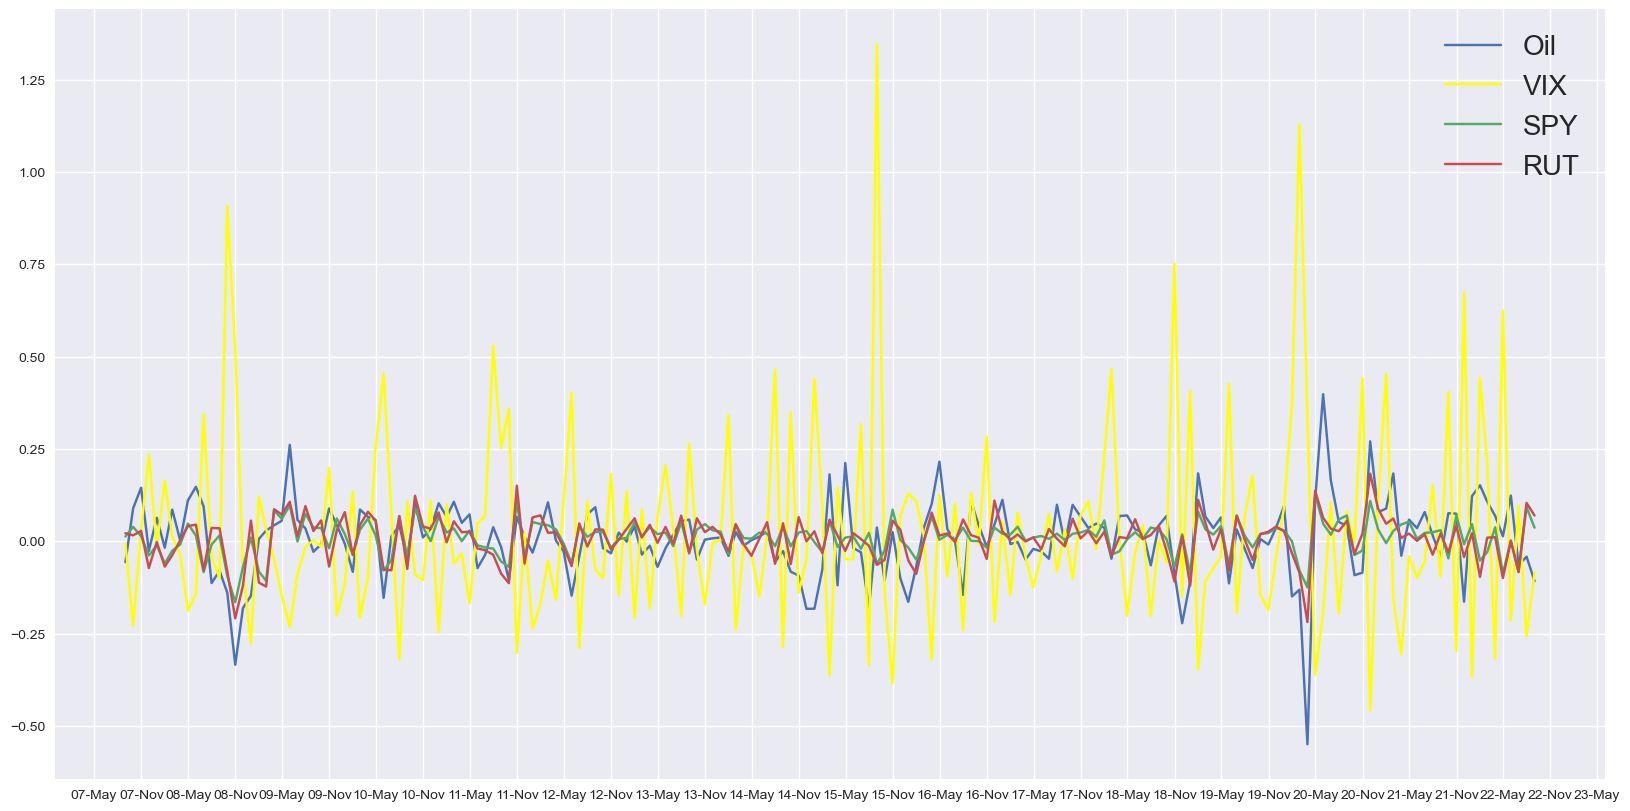

In [27]:
returns_monthly = prices_month.pct_change().round(4).dropna()
fig, ax = plt.subplots(figsize= (20,10))
ax.plot(returns_monthly["Oil"], label = "Oil")
ax.plot(returns_monthly["VIX"], label = "VIX", c = "yellow")
ax.plot(returns_monthly["SPY"], label = "SPY") 
ax.plot(returns_monthly["RUT"], label = "RUT")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%b'))
plt.legend(loc = 0, shadow = True, fontsize = 20)

Text(0, 0.5, 'Frequence')

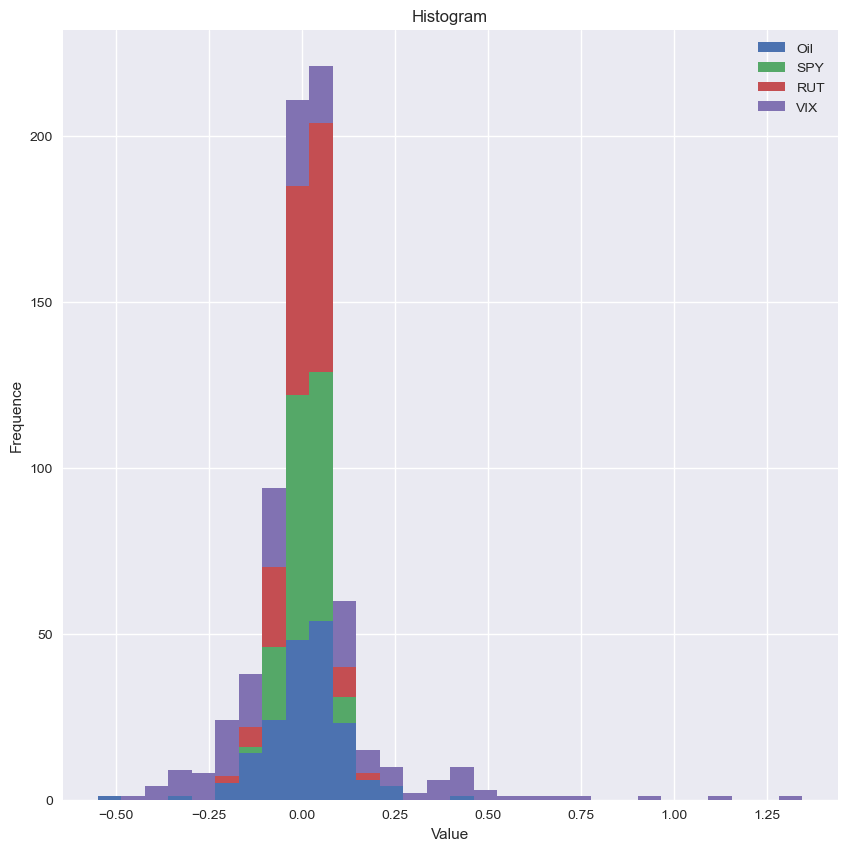

In [28]:
#Computing Monthly Returns From Prices Month Object

plt.figure(figsize = (10,10))
plt.hist(returns_monthly, stacked = True, bins = 30, label = ["Oil", "SPY", "RUT","VIX"] )
plt.legend(loc = 0)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequence")


As you can see the *VIX* index is very volatile with higher frequencies of positive and negative returns in the tails of the histogram. The other assets appear to be normal, however, we know financial data is not normally distributed. 

* Let's measure this equation:  $r_{it}^{spy} = \alpha + \beta_{1}r_{it}^{oil} + \beta_{2}r_{it}^{vix} + \beta_{3}r_{it}^{rut} +\epsilon$

$ starting with the full data set and then slicing the data to measure the relationship just before the pandemic started.

In [29]:
from textwrap import indent


r_spy = returns_monthly["SPY"]
independ_var = sm.add_constant(returns_monthly.drop(columns = "SPY"))
full_equation = sm.OLS(r_spy, independ_var).fit()
full_equation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     345.8
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           9.41e-74
Time:                        12:39:50   Log-Likelihood:                 475.64
No. Observations:                 181   AIC:                            -943.3
Df Residuals:                     177   BIC:                            -930.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.001      4.127      0.000       0.003       0.008
Oil            0.0144      0.015      0.983      0.327      -0.015       0.043
RUT            0.5728      0.031     18.472      0.000       0.512       0.634
VIX           -0.0386      0.006     -6.081      0.000      -0.051      -0.026
==============================================================================
Omnibus:                        0.179   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.322
Skew:                           0.046   Prob(JB):                        0.851
Kurtosis:                       2.815   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Here I am going to fit the model on training data until the pandemic starts and then test its performance on data after that time period.

In [30]:
train_data = independ_var[:"2019-10-01"]
train_dependent = r_spy[:"2019-10-01"]
train_model = sm.OLS(train_dependent,train_data).fit()
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     299.0
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           3.80e-61
Time:                        12:39:50   Log-Likelihood:                 397.02
No. Observations:                 146   AIC:                            -786.0
Df Residuals:                     142   BIC:                            -774.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.001      3.365      0.001       0.002       0.007
Oil            0.0379      0.017      2.236      0.027       0.004       0.071
RUT            0.5773      0.033     17.544      0.000       0.512       0.642
VIX           -0.0341      0.007     -4.777      0.000      -0.048      -0.020
==============================================================================
Omnibus:                        0.578   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.329
Skew:                          -0.103   Prob(JB):                        0.848
Kurtosis:                       3.108   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

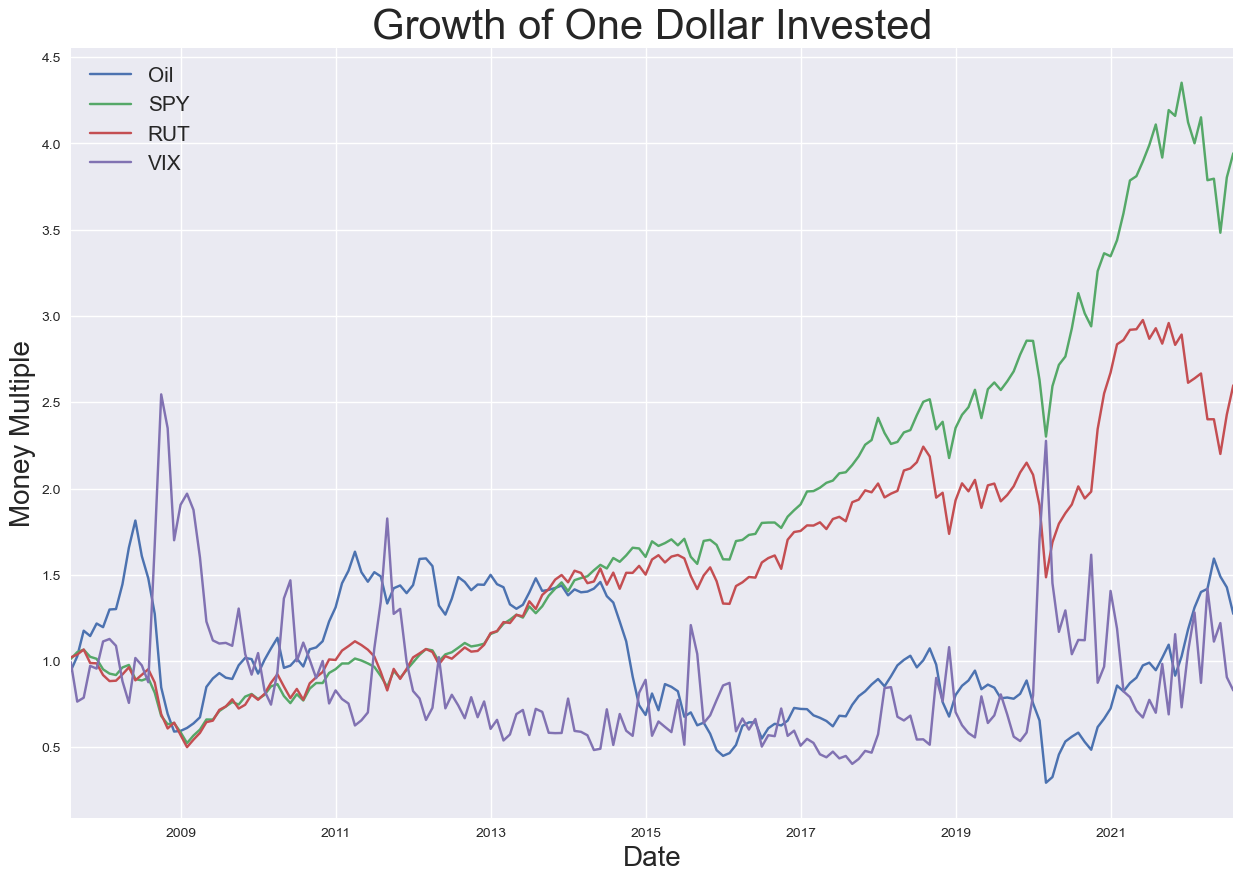

In [31]:
## Plotting Cumalative Returns on graph
(returns_monthly + 1).cumprod().plot(figsize = (15,10))
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Money Multiple", fontsize = 20)
plt.title("Growth of One Dollar Invested", fontsize = 30)
plt.legend(fontsize = 15)

,Oil,SPY,RUT,VIX
min,-0.549900,-0.165200,-0.219000,-0.459000
mean,0.007319,0.008671,0.007120,0.029141
std,0.104568,0.045910,0.059967,0.267850
median,0.013400,0.015100,0.016400,-0.016200
max,0.398100,0.127000,0.182900,1.345700


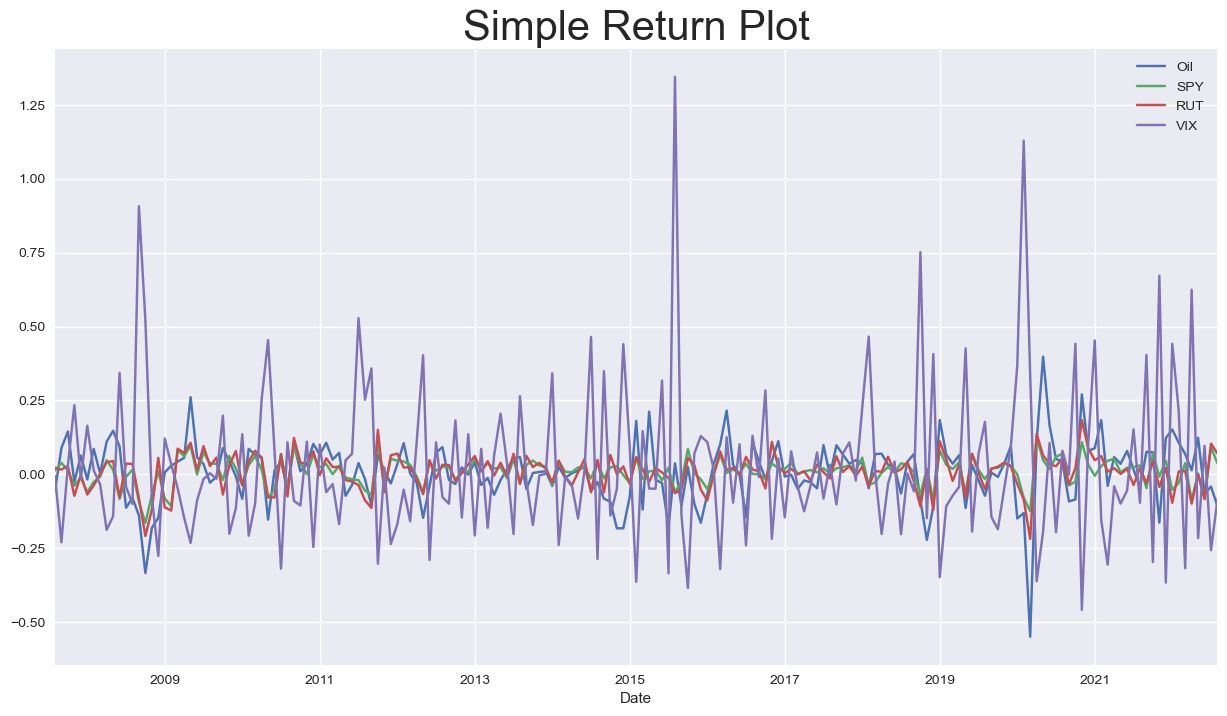

In [32]:
returns_monthly.plot(figsize = (15,8))

plt.title("Simple Return Plot", fontsize  =30)
returns_monthly.aggregate([min, np.mean, np.std,np.median, max])

,Oil,SPY,RUT,VIX
min,-0.798244,-0.180547,-0.247173,-0.614279
mean,0.001337,0.007576,0.005276,-0.001027
std,0.113386,0.046308,0.061027,0.239624
median,0.013286,0.015006,0.016237,-0.016311
max,0.335115,0.119544,0.167943,0.852588


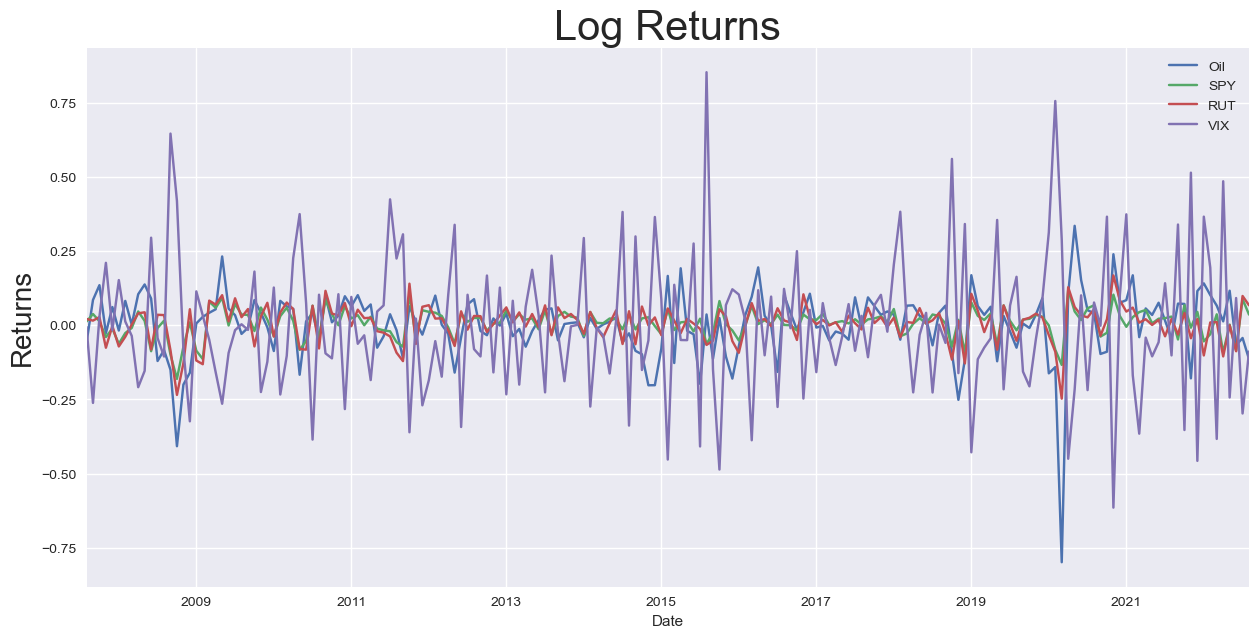

In [33]:
log_returns = np.log(prices_month/prices_month.shift(1)).dropna()
log_returns.plot(figsize = (15,7))
plt.title("Log Returns", fontsize = 30)
plt.ylabel("Returns", fontsize = 20)
log_returns.aggregate([min, np.mean, np.std,np.median, max])

Since 2008, we can clearly see that the most volatile security is the **VIX** index with a monthly standard deviation of approximately *26%.*


**SPY** averages a monthly return of *0.75%* with a monthly standard deviation of *4.5% since 2008. 

* Let's see how accurate our model is when we train our full model on the test data. The test data begins **2019-10-01** and goes until the last date in **2022.**

Text(0.5, 1.0, 'Observed vs Predicted Data')

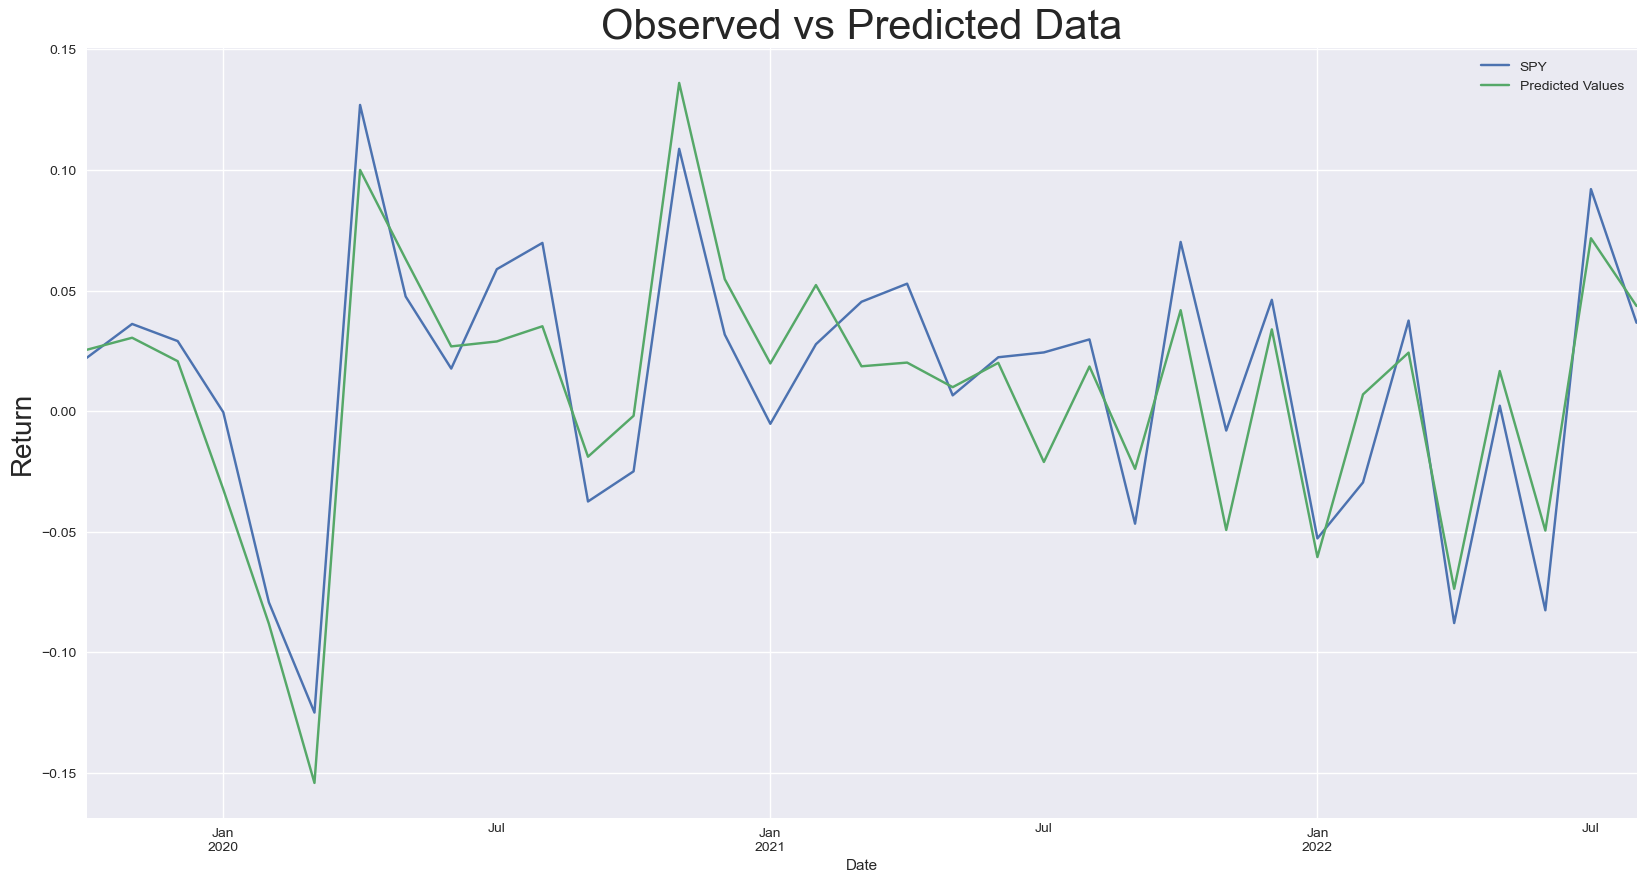

In [34]:
test_data = independ_var["2019-10-01":]
predicted = pd.DataFrame(train_model.predict(test_data), columns = ["Predicted Values"])
observed = pd.DataFrame(r_spy["2019-10-01":])
df1 = pd.concat((observed, predicted), axis = 1)
df1.plot(figsize = (20,10))
plt.ylabel("Return", fontsize = 20)
plt.title("Observed vs Predicted Data", fontsize = 30)

To test the performance of this model we need to calculate the $R^{2}$. Using algebra the $R^{2}$ is equal to the squared correlation coefficient between the **actual** $y_{i}$ and the *fitted values* $y_{i}.$

In [35]:
# R-squared from training model was 0.864
df1.corr()**2


,SPY,Predicted Values
SPY,1.000000,0.826623
Predicted Values,0.826623,1.000000


This values above indicate performance of the training model on test data. We see that $R^{2} = Corr(y_{i},\hat{y})^{2} = 0.826623$ This means our training model is accurate for predicting monthly returns. In fact, we can say *82%* of the sample variation in SPY returns can be explained by returns of **OIL, RUSSELL 2000, and VIX.**